In [1]:
import pandas as pd
#graffica
import seaborn as sns
#datos
import numpy as np
#graficador
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cars.csv',sep=';',quotechar='"', dtype={'Origin':'category'})

In [3]:
df.head(4)

Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0       130.0   
1          Buick Skylark 320  15.0          8         350.0       165.0   
2         Plymouth Satellite  18.0          8         318.0       150.0   
3              AMC Rebel SST  16.0          8         304.0       150.0   

   Weight  Acceleration  Model Origin  
0  3504.0          12.0     70     US  
1  3693.0          11.5     70     US  
2  3436.0          11.0     70     US  
3  3433.0          12.0     70     US

In [4]:
##presenta que tipo de informacion es
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Car           406 non-null    object  
 1   MPG           406 non-null    float64 
 2   Cylinders     406 non-null    int64   
 3   Displacement  406 non-null    float64 
 4   Horsepower    406 non-null    float64 
 5   Weight        406 non-null    float64 
 6   Acceleration  406 non-null    float64 
 7   Model         406 non-null    int64   
 8   Origin        406 non-null    category
dtypes: category(1), float64(5), int64(2), object(1)
memory usage: 26.0+ KB


In [5]:
#determiar frecuencia obtener informacion de la frecuncia absoluta como una serie de datos
x=df['Origin'].value_counts()

In [6]:
x

US        254
Japan      79
Europe     73
Name: Origin, dtype: int64

In [7]:
#obtener valor de la frecuencia absoluta, y a la serie de datos la transformo
#a datafrmae
x=df['Origin'].value_counts().to_frame()

In [8]:
x

Origin
US         254
Japan       79
Europe      73

In [9]:
#calculo del total
total=x['Origin'].sum()

In [10]:
total

406

In [11]:
#funcion para calcular la frecuencia relativa
def freq_relative(x):
    return x/total

In [12]:
#para dibujar pasteles
def angulo(x):
    return freq_relative(x)*360

In [13]:
x

Origin
US         254
Japan       79
Europe      73

In [14]:
freq_relative(x['Origin'])

US        0.625616
Japan     0.194581
Europe    0.179803
Name: Origin, dtype: float64

In [15]:
x

Origin
US         254
Japan       79
Europe      73

In [16]:
#Asigna a x una nueva columna con ese nombre y el resultado que se va a guardar esta en x
x=x.assign(freq_relative=freq_relative(x['Origin']))

In [17]:
#crear nueva columna para los datos de cada fila para dibujar el pastel
x=x.assign(angulo=angulo(x['Origin']))

In [18]:
x

Origin  freq_relative      angulo
US         254       0.625616  225.221675
Japan       79       0.194581   70.049261
Europe      73       0.179803   64.729064

In [19]:
x.sum()

Origin           406.0
freq_relative      1.0
angulo           360.0
dtype: float64

In [20]:
#descrube() permite ejecutar presentar la media , valores maximos y minimos,
#
x.describe()

Origin  freq_relative      angulo
count    3.000000       3.000000    3.000000
mean   135.333333       0.333333  120.000000
std    102.812126       0.253232   91.163462
min     73.000000       0.179803   64.729064
25%     76.000000       0.187192   67.389163
50%     79.000000       0.194581   70.049261
75%    166.500000       0.410099  147.635468
max    254.000000       0.625616  225.221675

In [21]:
#del data frame principal agrupame solo los de europa

europe=df.groupby('Origin').get_group('Europe')

In [22]:
europe.head(3)

Car   MPG  Cylinders  Displacement  Horsepower  \
10          Citroen DS-21 Pallas   0.0          4         133.0       115.0   
25  Volkswagen 1131 Deluxe Sedan  26.0          4          97.0        46.0   
26                   Peugeot 504  25.0          4         110.0        87.0   

    Weight  Acceleration  Model  Origin  
10  3090.0          17.5     70  Europe  
25  1835.0          20.5     70  Europe  
26  2672.0          17.5     70  Europe

In [23]:
#Para ordenar implace permite realizar una copia de los datos
#implace es false presenta los datos en pantalla si es 
#true se lo realiza inernamente
europe.sort_values("Horsepower", axis=0, ascending=True, inplace=True,na_position='last')

/home/yukas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [24]:
europe.head(3)

Car   MPG  Cylinders  Displacement  Horsepower  \
361                   Renault 18i  34.5          4         100.0         0.0   
337          Renault Lecar Deluxe  40.9          4          85.0         0.0   
25   Volkswagen 1131 Deluxe Sedan  26.0          4          97.0        46.0   

     Weight  Acceleration  Model  Origin  
361  2320.0          15.8     81  Europe  
337  1835.0          17.3     80  Europe  
25   1835.0          20.5     70  Europe

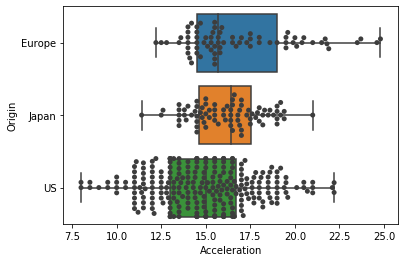

In [25]:
#plotar o graficar 
ax=sns.boxplot(x="Acceleration",y="Origin",data=df)
#para verificar como esta distribuida
ax=sns.swarmplot(x="Acceleration",y="Origin",data=df,color=".24")

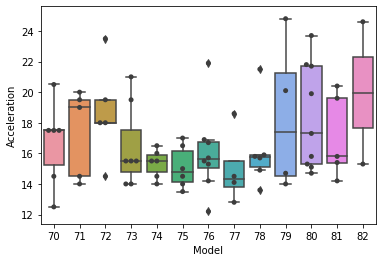

In [26]:
#plotar o graficar solo de europa deacuerdo al modeo y aceleracion.. y ver si existe sesgos
ax=sns.boxplot(x="Model",y="Acceleration",data=europe)
#para verificar como esta distribuida
ax=sns.swarmplot(x="Model",y="Acceleration",data=europe,color=".24")

In [27]:
europe72=europe.groupby('Model').get_group(72)

In [28]:
europe72.mean()

MPG               22.0
Cylinders          4.0
Displacement     111.0
Horsepower        79.6
Weight          2573.2
Acceleration      18.7
Model             72.0
dtype: float64

In [29]:
europe72.describe()

MPG  Cylinders  Displacement  Horsepower       Weight  \
count   5.000000        5.0      5.000000    5.000000     5.000000   
mean   22.000000        4.0    111.000000   79.600000  2573.200000   
std     2.915476        0.0     13.247641   21.709445   369.965133   
min    18.000000        4.0     96.000000   54.000000  2189.000000   
25%    21.000000        4.0     97.000000   69.000000  2254.000000   
50%    22.000000        4.0    120.000000   76.000000  2511.000000   
75%    23.000000        4.0    121.000000   87.000000  2933.000000   
max    26.000000        4.0    121.000000  112.000000  2979.000000   

       Acceleration  Model  
count      5.000000    5.0  
mean      18.700000   72.0  
std        3.251923    0.0  
min       14.500000   72.0  
25%       18.000000   72.0  
50%       18.000000   72.0  
75%       19.500000   72.0  
max       23.500000   72.0

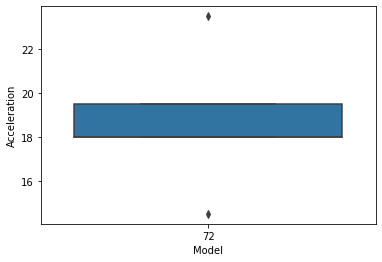

In [30]:
ax=sns.boxplot(x="Model",y="Acceleration", data=europe72)

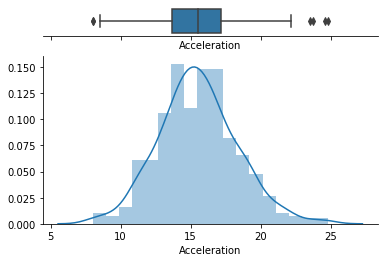

In [31]:
#2 variables para graficar 
#
f, (ax_box,ax_hist)= plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
#acelelracion para la caja
sns.boxplot(df['Acceleration'],ax=ax_box)
#grafico d ela campana d egaus
sns.distplot(df['Acceleration'],ax=ax_hist)

#
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
#graficar la informacion en el mismo marco
sns.despine(ax=ax_box, left=True)

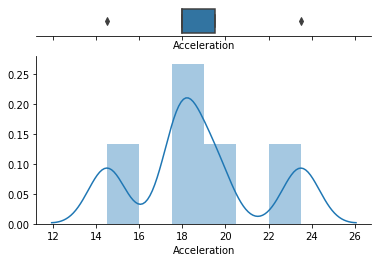

In [32]:
#2 variables para graficar 
#
f, (ax_box,ax_hist)= plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
#acelelracion para la caja
sns.boxplot(europe72['Acceleration'],ax=ax_box)
#grafico d ela campana d egaus
sns.distplot(europe72['Acceleration'],ax=ax_hist)

#
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
#graficar la informacion en el mismo marco
sns.despine(ax=ax_box, left=True)

In [33]:
europe72.describe()

MPG  Cylinders  Displacement  Horsepower       Weight  \
count   5.000000        5.0      5.000000    5.000000     5.000000   
mean   22.000000        4.0    111.000000   79.600000  2573.200000   
std     2.915476        0.0     13.247641   21.709445   369.965133   
min    18.000000        4.0     96.000000   54.000000  2189.000000   
25%    21.000000        4.0     97.000000   69.000000  2254.000000   
50%    22.000000        4.0    120.000000   76.000000  2511.000000   
75%    23.000000        4.0    121.000000   87.000000  2933.000000   
max    26.000000        4.0    121.000000  112.000000  2979.000000   

       Acceleration  Model  
count      5.000000    5.0  
mean      18.700000   72.0  
std        3.251923    0.0  
min       14.500000   72.0  
25%       18.000000   72.0  
50%       18.000000   72.0  
75%       19.500000   72.0  
max       23.500000   72.0